# Explore here

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df = df[['MedInc','Latitude','Longitude']]
df.head(10)

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
5,4.0368,37.85,-122.25
6,3.6591,37.84,-122.25
7,3.1200,37.84,-122.25
8,2.0804,37.84,-122.26
9,3.6912,37.84,-122.25


In [5]:
print(f'Las dimensiones del datset son: {df.shape}')
df.describe()

Las dimensiones del datset son: (20640, 3)


,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


In [6]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

5


Dado que solo tenemos 5 duplicados frente a 20640 que contien el dataset, estos van a ser eliminados.

In [7]:
#Eliminar duplicados
df = df.drop_duplicates()
print(f'Las dimensiones del datset sin duplicados son: {df.shape}')
df.head(5)

Las dimensiones del datset sin duplicados son: (20635, 3)


,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


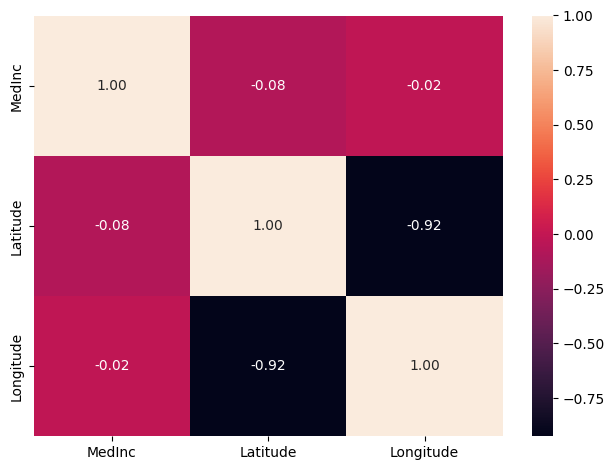

In [8]:
#Análisis de correlaciones
sns.heatmap(df[["MedInc", "Latitude", "Longitude"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()
     

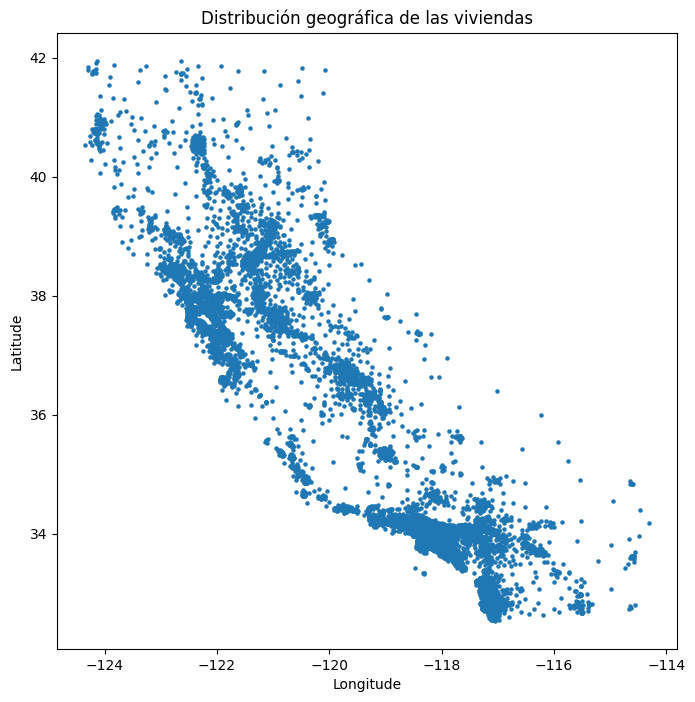

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(df["Longitude"], df["Latitude"], s=5)
plt.title("Distribución geográfica de las viviendas")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

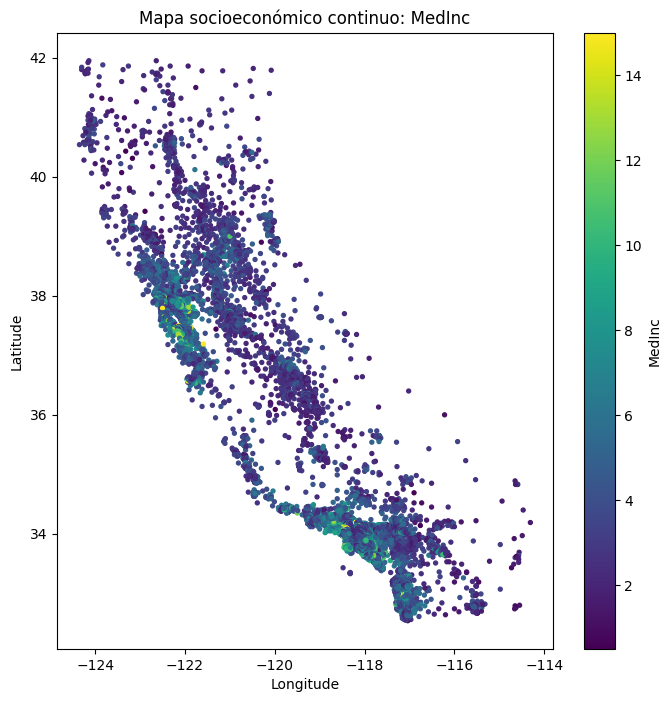

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(
    df["Longitude"], 
    df["Latitude"], 
    c=df["MedInc"], 
    cmap="viridis",
    s=8
)
plt.colorbar(label="MedInc")
plt.title("Mapa socioeconómico continuo: MedInc")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

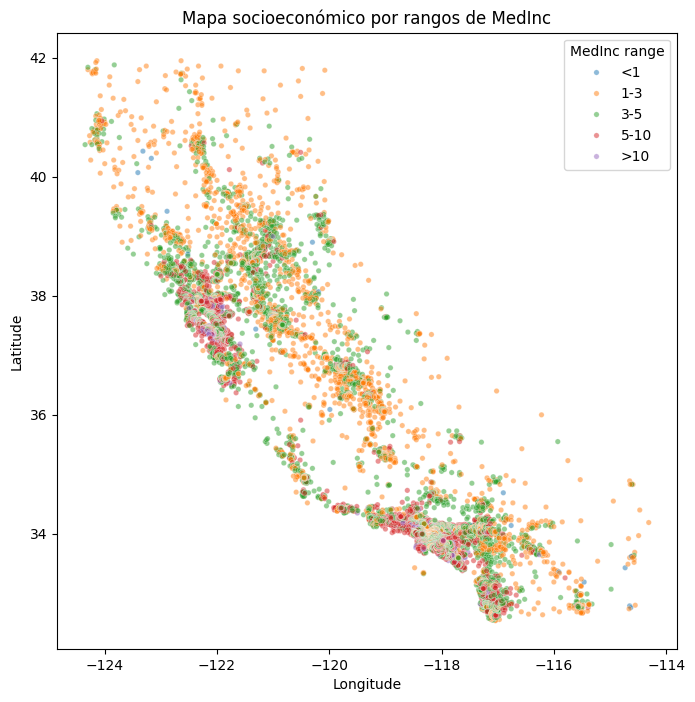

In [11]:
bins = [0, 1, 3, 5, 10, 20]
labels = ["<1", "1-3", "3-5", "5-10", ">10"]
df["inc_range"] = pd.cut(df["MedInc"], bins=bins, labels=labels)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    hue="inc_range",
    alpha=0.5,
    s=15
)
plt.title("Mapa socioeconómico por rangos de MedInc")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="MedInc range")
plt.show()

In [12]:
X = df.drop(['inc_range'], axis = 1)
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)
X_train

,MedInc,Latitude,Longitude
19985,3.1453,36.20,-119.31
11235,5.2384,33.81,-117.96
2271,3.5542,36.78,-119.80
8660,4.3594,33.85,-118.39
6250,3.4722,34.04,-117.98
...,...,...,...
11288,5.2370,33.80,-117.95
11968,1.9052,34.00,-117.41
5392,3.1827,34.04,-118.37
860,5.7192,37.58,-121.96


In [13]:
X_test

,MedInc,Latitude,Longitude
8572,8.4680,33.90,-118.41
1712,3.9722,37.97,-122.32
15916,3.4583,37.74,-122.42
5196,1.6625,33.94,-118.27
13583,1.5156,34.13,-117.29
...,...,...,...
8470,4.2596,33.91,-118.31
2144,2.7850,36.77,-119.76
3665,3.5521,34.22,-118.37
7111,4.4954,33.90,-118.02


In [14]:
# Instanciar el escalador
scaler = StandardScaler()

# Entrenar el escalador con los datos de entrenamiento
scaler.fit(X_train)

# Aplicar el escalador en ambos
X_train_final = scaler.transform(X_train)
X_train_final = pd.DataFrame(X_train_final, index = X_train.index, columns = X_train.columns)

X_test_final = scaler.transform(X_test)
X_test_final = pd.DataFrame(X_test_final, index = X_test.index, columns = X_test.columns)

X_train_final.head()

,MedInc,Latitude,Longitude
19985,-0.382144,0.258665,0.135576
11235,0.712733,-0.857456,0.807668
2271,-0.168253,0.529523,-0.108368
8660,0.252938,-0.838776,0.593594
6250,-0.211147,-0.750047,0.797711


### Modelo K-MEANS

In [15]:
modelK = KMeans(n_clusters=6, random_state = 42)
modelK.fit(X_train_final)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [16]:
# Obtener los centros de los clusters y las etiquetas
centroids = modelK.cluster_centers_
labels = modelK.labels_
centroids

array([[ 0.79415616,  0.96373884, -1.16702105],
       [-0.79436404, -0.74002732,  0.76705702],
       [ 3.96418716, -0.10000886, -0.11149583],
       [ 1.36644175, -0.82977993,  0.76047474],
       [-0.59348104,  1.16465296, -1.01973272],
       [ 0.1397417 , -0.82383388,  0.80278574]])

In [17]:
X_train_final['clusters'] = labels
X_train_final['clusters'] = X_train_final['clusters'].astype('category')
X_train_final

,MedInc,Latitude,Longitude,clusters
19985,-0.382144,0.258665,0.135576,1
11235,0.712733,-0.857456,0.807668,5
2271,-0.168253,0.529523,-0.108368,4
8660,0.252938,-0.838776,0.593594,5
6250,-0.211147,-0.750047,0.797711,5
...,...,...,...,...
11288,0.712001,-0.862126,0.812647,5
11968,-1.030827,-0.768727,1.081483,1
5392,-0.362581,-0.750047,0.603551,1
860,0.964235,0.903120,-1.183715,0


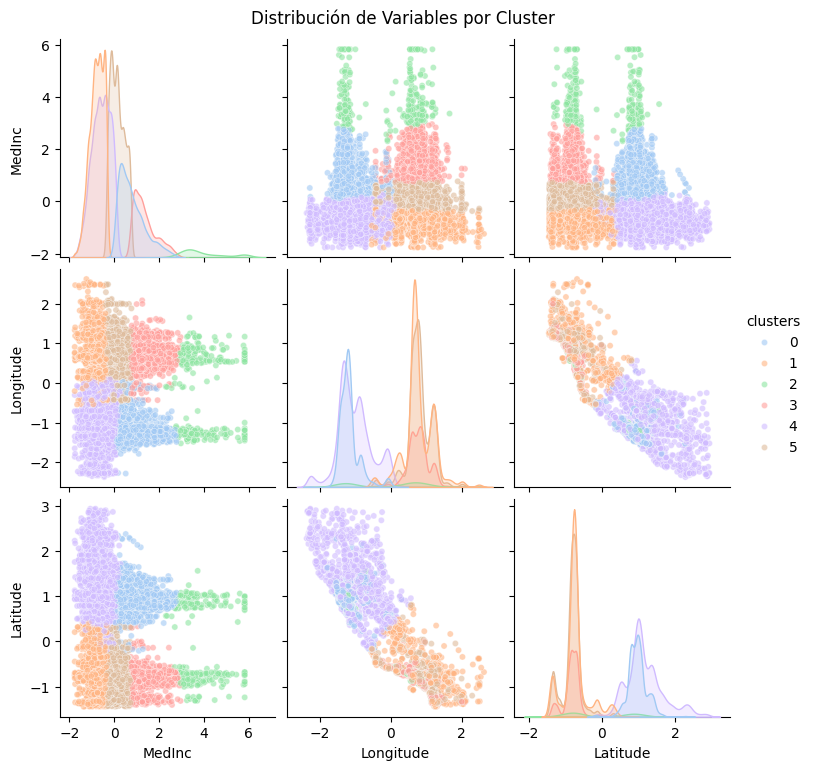

In [18]:
# Seleccionar las 3 variables + clusters
variables = ['MedInc', 'Longitude', 'Latitude', 'clusters']
sns.pairplot(X_train_final[variables], 
             hue='clusters', 
             palette='pastel', 
             plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle('Distribución de Variables por Cluster', y=1.02)
plt.show()

En este gráfico podemos ver como se relacionan las variables 2 a 2, y como se distribuyen los datos en 6 clusters por colores.

In [19]:
# Realizar predicciones con datos nuevos
predictions = modelK.predict(X_test_final)
X_test_final['clusters'] = predictions
X_test_final['clusters'] = X_test_final['clusters'].astype('category')
X_test_final

,MedInc,Latitude,Longitude,clusters
8572,2.402102,-0.815426,0.583637,3
1712,0.050398,1.085249,-1.362940,4
15916,-0.218418,0.977840,-1.412725,4
5196,-1.157781,-0.796746,0.653336,1
13583,-1.234623,-0.708017,1.141225,1
...,...,...,...,...
8470,0.200734,-0.810756,0.633422,5
2144,-0.570613,0.524853,-0.088455,4
3665,-0.169352,-0.665987,0.603551,5
7111,0.324078,-0.815426,0.777797,5


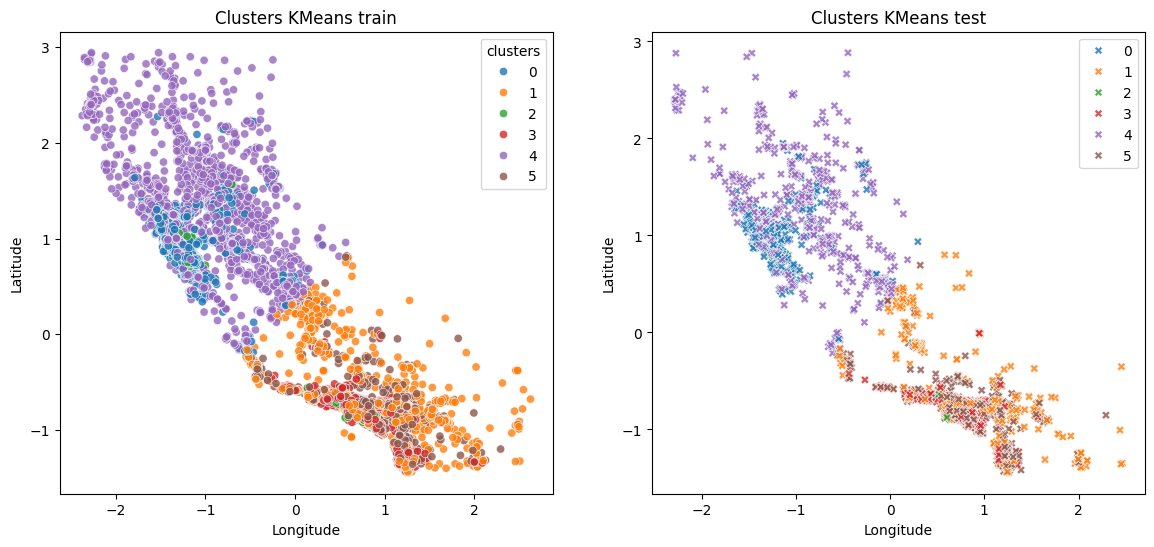

In [20]:
# Gráfico para comparar predicciones de nuevos datos de terst frente a los de train
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(ax=axes[0],
                x = X_train_final['Longitude'], 
                y = X_train_final['Latitude'], 
                hue=X_train_final['clusters'], 
                alpha = 0.8,
                )

axes[0].set_title("Clusters KMeans train")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

sns.scatterplot( ax=axes[1],
                x = X_test_final['Longitude'], 
                y = X_test_final['Latitude'], 
                hue=X_test_final['clusters'], 
                alpha = 0.8,
                marker = 'X'
                )

axes[1].set_title("Clusters KMeans test")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

plt.legend()
plt.show()

En los gráficos resultantes podemos observar que los valores del test se distribuyen en clusters de manera similoar al conjunto de train.

### Entrena un modelo de clasificación supervisada

Para este paso, elijo RandomForest ya que gracias a su arquitectura de múltiples árboles tiene la capacidad de capturar relaciones no lineales y complejas entre variables geográficas y socioeconómicas en las que se ha basado K-means para formar los clusters.

In [21]:
y_train = X_train_final['clusters']
X_train_final = X_train_final.drop(['clusters'], axis = 1)
y_test = X_test_final['clusters']
X_test_final = X_test_final.drop(['clusters'], axis = 1)

y_test

8572     3
1712     4
15916    4
5196     1
13583    1
        ..
8470     5
2144     4
3665     5
7111     5
16604    4
Name: clusters, Length: 4127, dtype: category
Categories (6, int32): [0, 1, 2, 3, 4, 5]

In [22]:
X_test_final

,MedInc,Latitude,Longitude
8572,2.402102,-0.815426,0.583637
1712,0.050398,1.085249,-1.362940
15916,-0.218418,0.977840,-1.412725
5196,-1.157781,-0.796746,0.653336
13583,-1.234623,-0.708017,1.141225
...,...,...,...
8470,0.200734,-0.810756,0.633422
2144,-0.570613,0.524853,-0.088455
3665,-0.169352,-0.665987,0.603551
7111,0.324078,-0.815426,0.777797


In [23]:
# Búsqueda rápida de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

model_rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_final, y_train)

print("🔥 Mejores parámetros:", grid_search.best_params_)
print("🚀 Mejor accuracy (CV):", grid_search.best_score_)

# Usar el modelo optimizado
best_rf = grid_search.best_estimator_

🔥 Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
🚀 Mejor accuracy (CV): 0.9918222238427873


In [ ]:
# Entrenar modelo final con mejores parámetros
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1, 
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_train_final, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
# Evaluar en train y test
y_pred_train = best_rf.predict(X_train_final)
y_pred_test = best_rf.predict(X_test_final)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("🎯 COMPARACIÓN DE PRECISIÓN:")
print(f"✅ Accuracy en TRAIN: {train_accuracy:.4f}")
print(f"✅ Accuracy en TEST:  {test_accuracy:.4f}")
print(f"📊 Diferencia Train-Test: {train_accuracy - test_accuracy:.4f}")

🎯 COMPARACIÓN DE PRECISIÓN:
✅ Accuracy en TRAIN: 0.9992
✅ Accuracy en TEST:  0.9959
📊 Diferencia Train-Test: 0.0033


In [29]:
# Reporte de clasificación detallado
print("\n📊 REPORTE DE CLASIFICACIÓN (TEST):")
print(classification_report(y_test, y_pred_test))


📊 REPORTE DE CLASIFICACIÓN (TEST):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       583
           1       1.00      1.00      1.00      1013
           2       1.00      0.97      0.98        65
           3       1.00      1.00      1.00       386
           4       1.00      1.00      1.00      1078
           5       1.00      1.00      1.00      1002

    accuracy                           1.00      4127
   macro avg       1.00      0.99      0.99      4127
weighted avg       1.00      1.00      1.00      4127



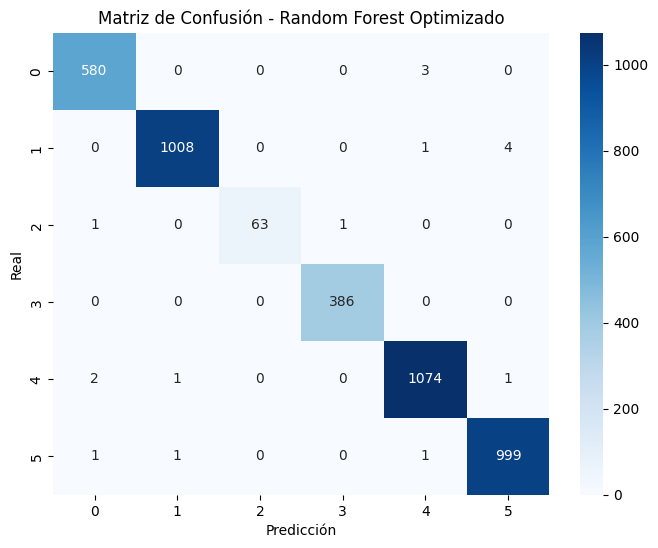

In [30]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(6), yticklabels=range(6))
plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [31]:
import pickle
# Guardar el modelo
with open("../models/Kmeans_6.sav", "wb") as f:
    pickle.dump(modelK, f)

with open("../models/DT_KMeans.sav", "wb") as f:
    pickle.dump(best_rf, f)

### Conclusión
El modelo de Random Forest demuestra un gran rendimiento, alcanzando un 99.6% de accuracy en test con un overfitting mínimo (solo 0.33% de diferencia con el train). La matriz de confusión confirma esta precisión, mostrando una diagonal casi perfecta con apenas unos pocos errores distribuidos entre los clusters.

Todos los clusters mantienen métricas sólidas: precision, recall y F1-score del 99-100% en cada categoría, lo que valida que el K-means creó agrupaciones bien definidas y consistentes. Los patrones geográficos y económicos detectados son claramente distinguibles y altamente predecibles.

En resumen, se obtiene un pipeline robusto que transforma datos no etiquetados en clusters significativos y luego en un modelo de clasificación supervisada con mucha precisión.